In [89]:
#Import Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
from  scipy.stats import pearsonr

In [218]:
stock = pd.read_csv('../../datasets/raw_analyst_ratings.csv')


In [219]:
print(stock.shape)

(1407328, 6)


In [220]:
stock.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [221]:
stock

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [222]:
stock['publisher'].value_counts()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [223]:
stock['stock'].value_counts()

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64

In [224]:
stock['hedline_length']= stock['headline'].apply(lambda x: len(x))

In [225]:
stock[['headline','hedline_length']]

,headline,hedline_length
0,Stocks That Hit 52-Week Highs On Friday,39
1,Stocks That Hit 52-Week Highs On Wednesday,42
2,71 Biggest Movers From Friday,29
3,46 Stocks Moving In Friday's Mid-Day Session,44
4,B of A Securities Maintains Neutral on Agilent...,87
...,...,...
1407323,Top Narrow Based Indexes For August 29,38
1407324,Recap: Wednesday's Top Percentage Gainers and ...,52
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,56
1407326,Oppenheimer Initiates China Zenix At Outperfor...,54


In [226]:
stock[['date', 'headline']]

,date,headline
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...
...,...,...
1407323,2011-08-29 00:00:00,Top Narrow Based Indexes For August 29
1407324,2011-06-22 00:00:00,Recap: Wednesday's Top Percentage Gainers and ...
1407325,2011-06-21 00:00:00,UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326,2011-06-21 00:00:00,Oppenheimer Initiates China Zenix At Outperfor...


In [227]:
stock['date'] = pd.to_datetime(stock['date'], format='ISO8601')


In [228]:
stock['date'] =stock['date'].dt.date
stock['date']

0          2020-06-05
1          2020-06-03
2          2020-05-26
3          2020-05-22
4          2020-05-22
              ...    
1407323    2011-08-29
1407324    2011-06-22
1407325    2011-06-21
1407326    2011-06-21
1407327    2011-05-12
Name: date, Length: 1407328, dtype: object

In [229]:
# data_time= stocks['date'].apply(lambda x: len(x.split())>1)

In [230]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abreham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [231]:
sentiment_datas = stock.copy()

In [232]:
sia = SentimentIntensityAnalyzer()

In [233]:
sentiment_datas['sentiment'] = sentiment_datas['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])

In [234]:
sentiment_datas['domain']=sentiment_datas['publisher'].str.split('@').str[1]

In [235]:
domain_values= sentiment_datas['domain'].value_counts().reset_index()

domain_values

,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


In [245]:
# droping column in the dataframe
# sentiment_datas.drop('hedline_length', axis='columns', inplace=True)

In [208]:
# sentiment_datas.rename(columns={'dt':'date'}, inplace=True)

In [246]:
sentiment_datas

,headline,url,publisher,date,stock,sentiment,category
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.0000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.0000,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.0000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.0000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.2960,Positive
...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX,0.2023,Positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX,-0.3818,Negative
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX,0.0000,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX,0.0000,Neutral


In [239]:
# Function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [240]:
sentiment_datas['category'] = sentiment_datas['sentiment'].apply(lambda x: categorize_sentiment(x))

In [247]:
sentiment_datas

,headline,url,publisher,date,stock,sentiment,category
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.0000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.0000,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.0000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.0000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.2960,Positive
...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX,0.2023,Positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX,-0.3818,Negative
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX,0.0000,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX,0.0000,Neutral


In [249]:
# sentiment_datas.drop(subset=['date'], keep='second', inplace=True)

In [250]:
# sentiment_datas['date'] = pd.to_datetime(sentiment_datas['date'], format='ISO8601')

In [251]:
# sentiment_datas['date'] =sentiment_datas['date'].dt.date

In [252]:
sentiment_datas['date']

0          2020-06-05
1          2020-06-03
2          2020-05-26
3          2020-05-22
4          2020-05-22
              ...    
1407323    2011-08-29
1407324    2011-06-22
1407325    2011-06-21
1407326    2011-06-21
1407327    2011-05-12
Name: date, Length: 1407328, dtype: object

In [256]:
publishers= sentiment_datas[['publisher']].value_counts().reset_index()
publishers

,publisher,count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,MyConstant Chris Roper,1
1030,milesyoung,1
1031,Nat,1
1032,mjintertrader,1


In [257]:
average_sentimet = sentiment_datas.groupby('publisher')['sentiment'].mean()
average_sentimet

publisher
47ertrends                    0.000000
AARP                          0.018429
ABNNewswire                   0.038731
Aakin                         0.136000
Aaron Jackson.Ed              0.322244
                                ...   
vic@forextraininggroup.com    0.000000
vishwanath@benzinga.com      -0.049120
vivek.proactive@gmail.com    -0.045008
wallstreet1928               -0.018150
webmaster                     0.034903
Name: sentiment, Length: 1034, dtype: float64

In [259]:
article_per_date = sentiment_datas['date'].value_counts().sort_index(ascending=False)
article_per_date

date
2020-06-11    544
2020-06-10    806
2020-06-09    804
2020-06-08    765
2020-06-07     25
             ... 
2009-05-27      6
2009-05-22      1
2009-04-29      1
2009-04-27      2
2009-02-14      1
Name: count, Length: 3955, dtype: int64

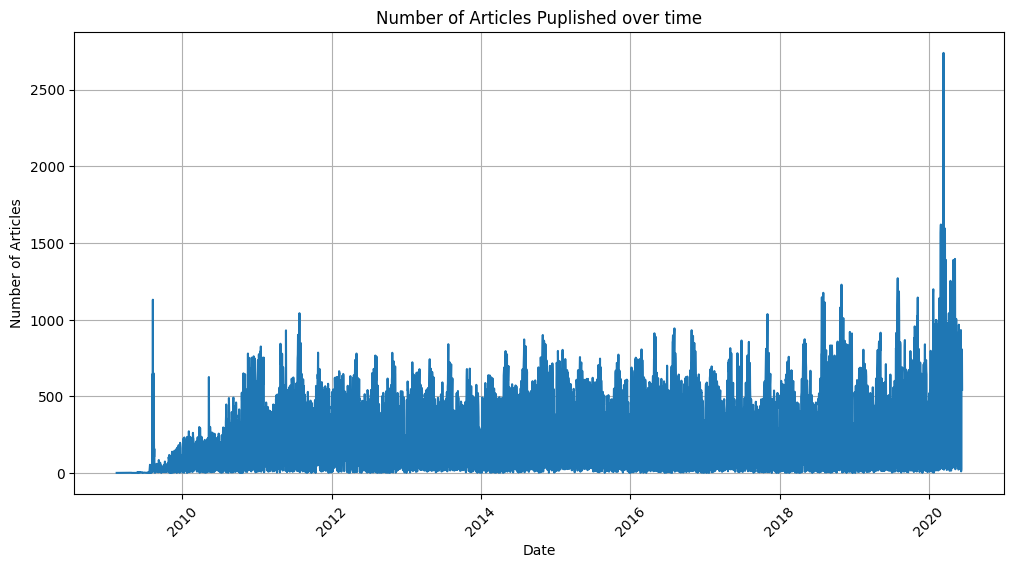

In [260]:
plt.figure(figsize=(12,6))
sns.lineplot(x=article_per_date.index, y=article_per_date.values, markers='o')
plt.title("Number of Articles Puplished over time")
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation= 45)
plt.grid()
plt.show()

In [261]:
apple_data = sentiment_datas[sentiment_datas['stock']=='AAPL']
apple_data

,headline,url,publisher,date,stock,sentiment,category
6680,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,0.5574,Positive
6681,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,0.0000,Neutral
6682,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,0.2023,Positive
6683,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,0.0000,Neutral
6684,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,0.3818,Positive
...,...,...,...,...,...,...,...
7116,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10,AAPL,-0.1280,Negative
7117,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10,AAPL,0.0000,Neutral
7118,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09,AAPL,-0.9062,Negative
7119,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09,AAPL,0.0000,Neutral


In [262]:
apple_data['category'].value_counts()

category
Neutral     195
Positive    149
Negative     97
Name: count, dtype: int64

In [147]:
appl = pd.read_csv('../../datasets/AAPL_historical_data.csv')
amazon = pd.read_csv('../../datasets/AMZN_historical_data.csv')
google = pd.read_csv('../../datasets/GOOG_historical_data.csv')
meta = pd.read_csv('../../datasets/META_historical_data.csv')
microsoft = pd.read_csv('../../datasets/MSFT_historical_data.csv')
nvidia = pd.read_csv('../../datasets/NVDA_historical_data.csv')
tesla = pd.read_csv('../../datasets/TSLA_historical_data.csv')


In [263]:
# appl.set_index(['Date'],inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [264]:
appl

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


In [140]:
appl['Close'].sort_values(ascending=False)

Date
2024-07-16    234.820007
2024-07-15    234.399994
2024-07-10    232.979996
2024-07-12    230.539993
2024-07-17    228.880005
                 ...    
1982-07-12      0.051897
1982-07-06      0.051339
1982-07-07      0.051339
1982-07-09      0.050781
1982-07-08      0.049107
Name: Close, Length: 10998, dtype: float64

<Axes: >

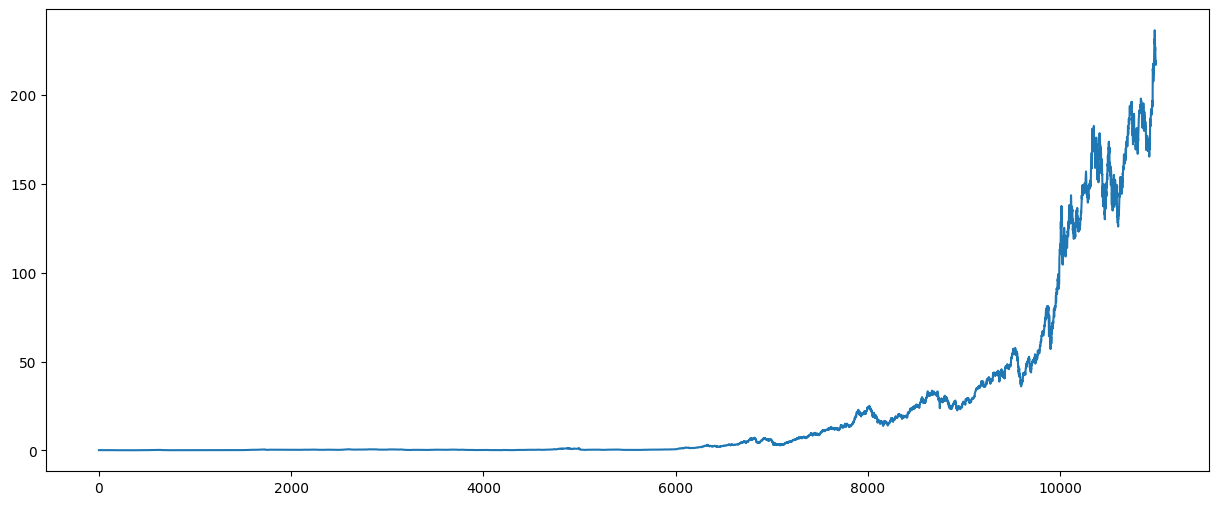

In [342]:
plt.figure(figsize=(15,6))
appl['Open'].plot()

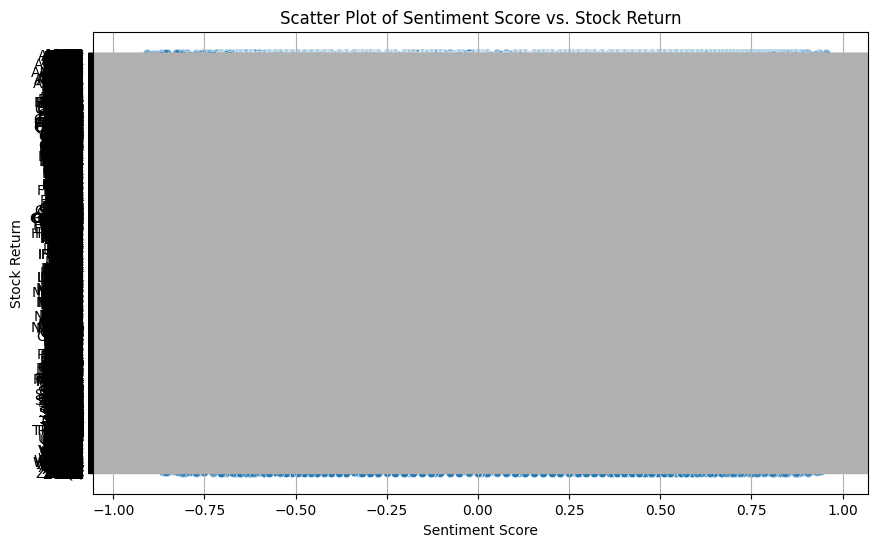

In [265]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sentiment_datas['sentiment'], y=sentiment_datas['stock'], alpha=0.6)
plt.title('Scatter Plot of Sentiment Score vs. Stock Return')
plt.xlabel('Sentiment Score')
plt.ylabel('Stock Return')
plt.grid(True)
plt.show()


Mergining and coreelating news dataset and stock dataset

In [152]:
# appl.rename(columns={'Date':'date'}, inplace=True)

In [155]:
appl

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


In [266]:
sentiment_datas

,headline,url,publisher,date,stock,sentiment,category
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.0000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.0000,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.0000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.0000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.2960,Positive
...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX,0.2023,Positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX,-0.3818,Negative
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX,0.0000,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX,0.0000,Neutral


In [270]:
merged_data = sentiment_datas.merge(appl, on='date')

In [269]:
sentiment_datas['date'] = pd.to_datetime(sentiment_datas['date'])
appl['date'] = pd.to_datetime(appl['date'])

In [284]:
merged_data.set_index('date',inplace=True)

In [289]:
merged_data

,headline,url,publisher,stock,sentiment,category,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
date,,,,,,,,,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.0000,Neutral,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,NaN
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.0000,Neutral,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0,-0.019246
2020-05-26,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.0000,Neutral,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0,-0.025806
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.0000,Neutral,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0,0.006820
2020-05-22,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.2960,Positive,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-29,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,0.2023,Positive,13.863571,13.982143,13.857143,13.927500,11.761426,405269200,0.0,0.0,0.056801
2011-06-22,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX,-0.3818,Negative,11.612857,11.746429,11.513571,11.521786,9.729860,390583200,0.0,0.0,-0.172731
2011-06-21,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,0.0000,Neutral,11.310000,11.635714,11.257143,11.617857,9.810995,493382400,0.0,0.0,0.008338


In [318]:
merged_data['daily_return']= merged_data['Close'].pct_change()

In [315]:
merged_data.drop(merged_data.columns[14], axis=1, inplace=True)

In [316]:
merged_data.columns

Index(['headline', 'url', 'publisher', 'stock', 'sentiment', 'category',
       'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [319]:
# fill NaN values with mean of a value
# merged_data.fillna(merged_data['daily_return'].mean(), inplace=True)
merged_data.head(2)

,headline,url,publisher,stock,sentiment,category,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
date,,,,,,,,,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.0,Neutral,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,NaN
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.0,Neutral,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0,-0.019246


In [320]:
# percentage change in daily closing prices
merged_data['daily_return']

date
2020-06-05         NaN
2020-06-03   -0.019246
2020-05-26   -0.025806
2020-05-22    0.006820
2020-05-22    0.000000
                ...   
2011-08-29    0.056801
2011-06-22   -0.172731
2011-06-21    0.008338
2011-06-21    0.000000
2011-05-12    0.065386
Name: daily_return, Length: 1379646, dtype: float64

In [331]:
merged_data.dropna(inplace=True)

In [332]:
merged_data.head(2)

,headline,url,publisher,stock,sentiment,category,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
date,,,,,,,,,,,,,,,
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.0,Neutral,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0,-0.019246
2020-05-26,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.0,Neutral,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0,-0.025806


In [343]:
#monthly return
merged_data['month']=merged_data['date'].dt.month

KeyError: 'date'

Correlating news sentiment and daily stock price

In [333]:
correlation, p_value = pearsonr(merged_data['sentiment'], merged_data['daily_return'])

In [337]:
format(correlation,'.3f')

'0.002'

In [339]:
format(p_value,'.3f')

'0.009'